<a href="https://colab.research.google.com/github/KellyPared/analyzing_hscourse_data/blob/main/Grade_Level_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd


which students are capable/ with predictions--passsing.

predicting grade/ability

turn grade levels into

look what has the greates amount of points.

In [45]:

# Load the data
df = pd.read_csv('Data_Set_9-12.csv')

# Check the shape of the DataFrame
print(df.shape)

# Check the first few rows of the DataFrame
print(df.head())


(5131, 4)
  StudentID                          Course  Grade  Section_Grade
0    STU711                English I Honors      9          96.67
1    STU711                French II Honors      9          87.92
2    STU711  Computer Science Principles AP      9          86.02
3    STU711                       Chemistry      9          88.89
4    STU711              Human Geography AP      9          88.49


In [46]:

new_df = pd.read_csv('Data_Set_9-12.csv')

keywords_to_course_type = {
    'french spanish german latin chinese': 'Foreign Language',
    'math algebra statistics geometry calculus': 'Math',
    'english writers literature shakespeare': 'English',
    'human government world history microeconomics': 'Humanities',
    'science astronomy biology physics anatomy chemistry': 'Science',
    'data computer artificial': "Computer Science",
    'capstone': "Research",
    'visual arts art music': 'Arts',
    'psychology great decisions': 'Psychology',
    'entrepreneurship': 'Entrepreneurship',
    'constitutional international politics':'Law and Politics'
}

def get_course_type(course):
    '''find words in keywords and assign'''
    for keyword, course_type in keywords_to_course_type.items():
        if any(word in course.lower() for word in keyword.split()):
            return course_type
    return 'unknown'

# apply the function to the 'Course' column to create a new 'Course_Type' column
new_df['Course_Type'] = new_df['Course'].apply(get_course_type)

# display the updated dataframe
new_df.head(100)


,StudentID,Course,Grade,Section_Grade,Course_Type
0,STU711,English I Honors,9,96.67,English
1,STU711,French II Honors,9,87.92,Foreign Language
2,STU711,Computer Science Principles AP,9,86.02,Science
3,STU711,Chemistry,9,88.89,Science
4,STU711,Human Geography AP,9,88.49,Humanities
...,...,...,...,...,...
95,STU348,Computer Science Principles AP,9,98.83,Science
96,STU348,Chemistry Honors,9,93.57,Science
97,STU348,World History AP,9,98.98,Humanities
98,STU735,English I Honors,9,94.60,English


In [47]:
# find unknown data strings in the 'col1' column
unknowns = new_df[new_df['Course_Type'] == 'unknown']
print(unknowns)

Empty DataFrame
Columns: [StudentID, Course, Grade, Section_Grade, Course_Type]
Index: []


In [48]:
new_df["Course_Type"].unique()

array(['English', 'Foreign Language', 'Science', 'Humanities', 'Math',
       'Psychology', 'Arts', 'Law and Politics', 'Entrepreneurship',
       'Computer Science', 'Research'], dtype=object)

In [49]:
# calculate the average grade per course
avg_grades = new_df.groupby('Course')['Section_Grade'].mean()

# print the result
print(avg_grades)

Course
AP Research (Capstone Year 2)          97.055000
AP Seminar (Capstone Year 1)           90.933333
Algebra II                             86.140000
Algebra II Honors                      90.570000
Anatomy and Physiology Honors          91.059403
                                         ...    
Talented Writers Program III Honors    90.171429
United States History AP               90.253567
United States History Honors           89.568125
Women Writers Post-AP                  95.564667
World History AP                       95.681765
Name: Section_Grade, Length: 105, dtype: float64


In [ ]:
#dont use id

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical variables
encoder = OneHotEncoder()
X = encoder.fit_transform(new_df[['Grade', 'Course_Type']])

# Extract the target variable
y = new_df['Section_Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [55]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 3.96020623868929


 a MAE of 3.96020623868929 means that, on average, the model's predictions are off by approximately 3.96 units (in the same units as the target variable). This indicates that the model's performance may not be very accurate, and there may be room for improvement. However, the interpretation of the MAE also depends on the scale of the target variable and the context of the problem.

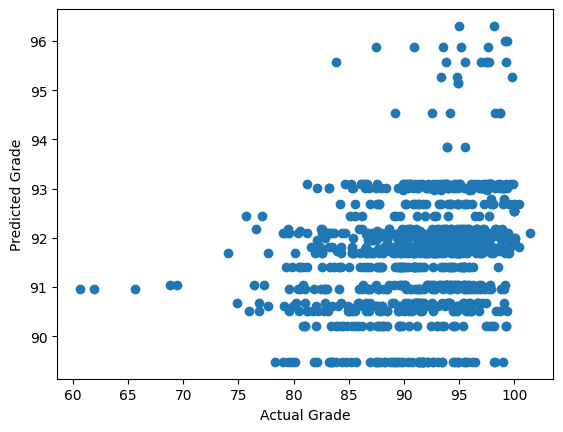

In [56]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual vs predicted grades
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.show()


In [25]:
import pandas as pd
from sklearn.cluster import KMeans



# Select the features that you want to use for clustering
X = new_df[['Grade', 'Section_Grade']]

# Define the number of clusters you want to create
num_clusters = 3

# Create a k-means clustering model with the specified number of clusters
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the model to the data
kmeans.fit(X)

# Add a new column to the original DataFrame with the cluster labels for each data point
new_df['Cluster'] = kmeans.labels_

# Print the cluster centers
print(kmeans.cluster_centers_)


[[10.4789916  90.53703548]
 [10.65844636 82.80541307]
 [10.55280073 96.16747934]]


In [59]:
new_df.head()

,StudentID,Course,Grade,Section_Grade,Course_Type,Cluster
0,STU711,English I Honors,9,96.67,English,1
1,STU711,French II Honors,9,87.92,Foreign Language,2
2,STU711,Computer Science Principles AP,9,86.02,Science,0
3,STU711,Chemistry,9,88.89,Science,2
4,STU711,Human Geography AP,9,88.49,Humanities,2


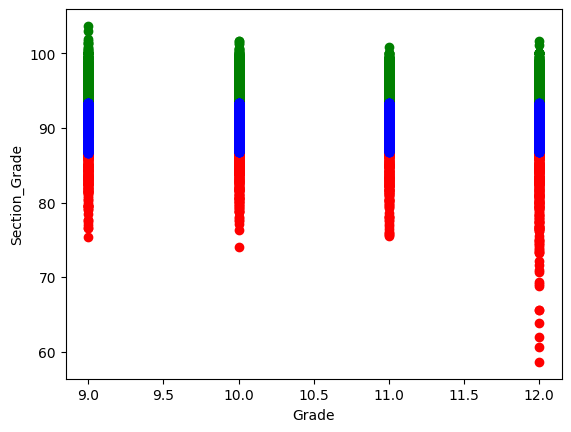

In [58]:


# Plot the data points colored by their assigned clusters
colors = ['r', 'g', 'b']
for i in range(num_clusters):
    plt.scatter(X[new_df['Cluster'] == i]['Grade'], X[new_df['Cluster'] == i]['Section_Grade'], c=colors[i])
plt.xlabel('Grade')
plt.ylabel('Section_Grade')
plt.show()


In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# encode the categorical variable "Course" using label encoding
le = LabelEncoder()
new_df['Course_enc'] = le.fit_transform(new_df['Course'])

# split the data into training and testing sets with a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(['Grade'], axis=1), df['Grade'], test_size=0.2, random_state=42)

# print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (4104, 6) (4104,)
Testing set shape: (1027, 6) (1027,)


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = new_df.copy()

# Encode the categorical variables
le = LabelEncoder()
df['Course_enc'] = le.fit_transform(df['Course'])
df['Course_Type_enc'] = le.fit_transform(df['Course_Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Course_enc', 'Section_Grade', 'Course_Type_enc']], df['Grade'], test_size=0.2, random_state=42)

# Train a random forest regressor on the training set
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)


Mean squared error: 0.2298913848612861


The mean squared error (MSE) is a measure of how well a regression model fits the data. It measures the average squared difference between the predicted values and the actual values. The value of MSE ranges from 0 to infinity, with a lower value indicating a better fit of the model.

In your case, the value of MSE is 0.2298, which means that on average, the predicted values are off by the square root of 0.2298. A lower value of MSE indicates a better fit of the model to the data.

In [37]:
computer_df = new_df.copy()
computer_df.columns

Index(['StudentID', 'Course', 'Grade', 'Section_Grade', 'Cluster',
       'Course_enc', 'Course_Type_Arts', 'Course_Type_Computer Science',
       'Course_Type_English', 'Course_Type_Entrepreneurship',
       'Course_Type_Foreign Language', 'Course_Type_Humanities',
       'Course_Type_Law and Politics', 'Course_Type_Math',
       'Course_Type_Psychology', 'Course_Type_Research',
       'Course_Type_Science'],
      dtype='object')

In [38]:
computer_df = pd.get_dummies(computer_df, columns=['Course_Type_Arts', 'Course_Type_Computer Science',
       'Course_Type_English', 'Course_Type_Entrepreneurship',
       'Course_Type_Foreign Language', 'Course_Type_Humanities',
       'Course_Type_Law and Politics', 'Course_Type_Math',
       'Course_Type_Psychology', 'Course_Type_Research',
       'Course_Type_Science'])

In [43]:
computer_df.describe()

,Grade,Section_Grade,Cluster,Course_enc,Course_Type_Arts_0,Course_Type_Arts_1,Course_Type_Computer Science_0,Course_Type_Computer Science_1,Course_Type_English_0,Course_Type_English_1,...,Course_Type_Law and Politics_0,Course_Type_Law and Politics_1,Course_Type_Math_0,Course_Type_Math_1,Course_Type_Psychology_0,Course_Type_Psychology_1,Course_Type_Research_0,Course_Type_Research_1,Course_Type_Science_0,Course_Type_Science_1
count,5131.000000,5131.000000,5131.000000,5131.000000,5131.000000,5131.000000,5131.000000,5131.000000,5131.000000,5131.000000,...,5131.000000,5131.000000,5131.000000,5131.000000,5131.000000,5131.000000,5131.00000,5131.00000,5131.000000,5131.000000
mean,10.538686,91.704987,1.005457,46.981875,0.981095,0.018905,0.989671,0.010329,0.828883,0.171117,...,0.991035,0.008965,0.826739,0.173261,0.970571,0.029429,0.99006,0.00994,0.767492,0.232508
std,1.106165,5.141133,0.917859,29.334560,0.136202,0.136202,0.101117,0.101117,0.376648,0.376648,...,0.094268,0.094268,0.378509,0.378509,0.169022,0.169022,0.09921,0.09921,0.422472,0.422472
min,9.000000,58.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,10.000000,88.980000,0.000000,26.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000
50%,11.000000,92.580000,1.000000,41.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000
75%,12.000000,95.395000,2.000000,71.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000
max,12.000000,103.700000,2.000000,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Define features and target variable
X = new_df.drop(['StudentID', 'Course', 'Grade', 'Section_Grade', 'Cluster'], axis=1)
y = new_df['Course_Type_Computer Science'].values # Binary target variable: 1 if the course is a computer course, 0 otherwise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict target variable on testing set
y_pred = clf.predict(X_test)

# Compute accuracy score
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc_score)


Accuracy score: 1.0
